# GOOGLE STOCK PRICE PREDICTION(FORECASTING)

## Here we have the link of data https://www.kaggle.com/hanumanstark/google-stock-prices/data
- we used linear regression model for prediction of next 15(days) stock price 
- Here preprocess the data first using below module
## This is like time series forecasting 

## Importing library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
%matplotlib inline

## importing dataset(GOOGL.CSV)
- Make date format as index of data using parse_dates technique

In [2]:
   data=pd.read_csv('GOOGL.csv',sep=',',parse_dates=['Date'],index_col='Date')

## View of data

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2335 entries, 2009-05-22 to 2018-08-29
Data columns (total 6 columns):
Open         2335 non-null float64
High         2335 non-null float64
Low          2335 non-null float64
Close        2335 non-null float64
Adj Close    2335 non-null float64
Volume       2335 non-null int64
dtypes: float64(5), int64(1)
memory usage: 127.7 KB


## Visualizing dataset of each column

<Figure size 1440x1440 with 0 Axes>

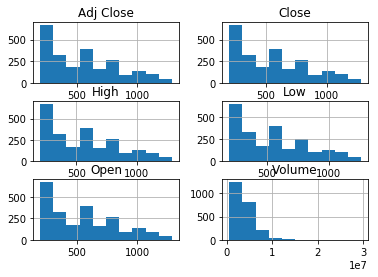

In [5]:
 plt.figure(figsize=(20,20))
data.hist()
plt.show()

## Corellation among data

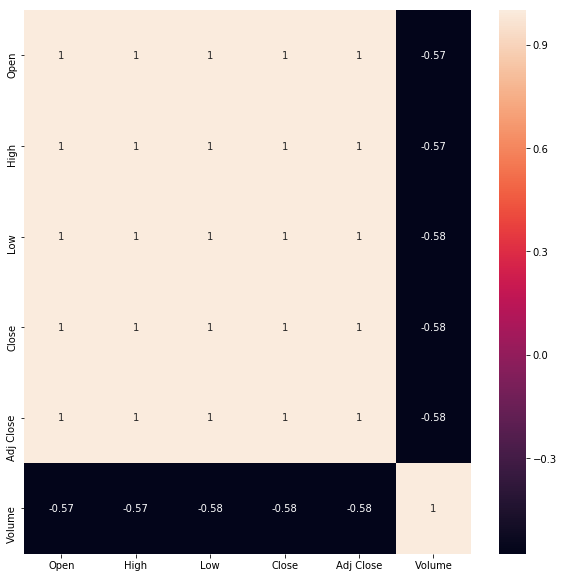

In [6]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

## Graphical view of closing value of stock market

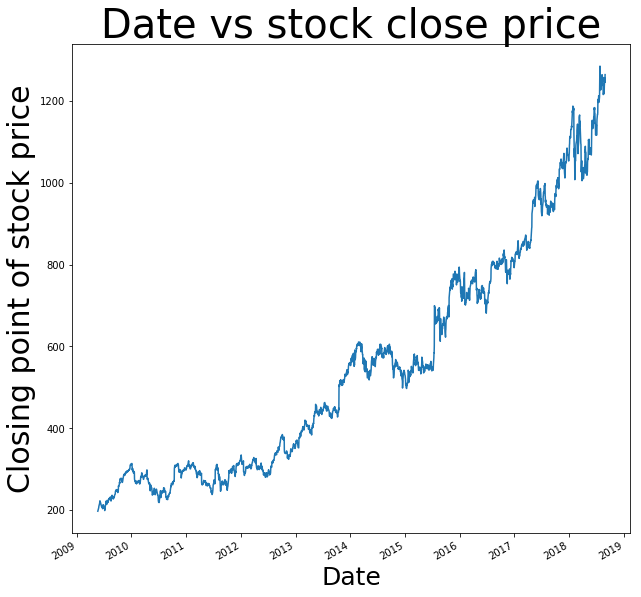

In [7]:
plt.figure(figsize=(10,10))
data['Close'].plot()
plt.xlabel('Date',fontsize=25)
plt.ylabel('Closing point of stock price',fontsize=30)
plt.title('Date vs stock close price',fontsize=40)
plt.show()

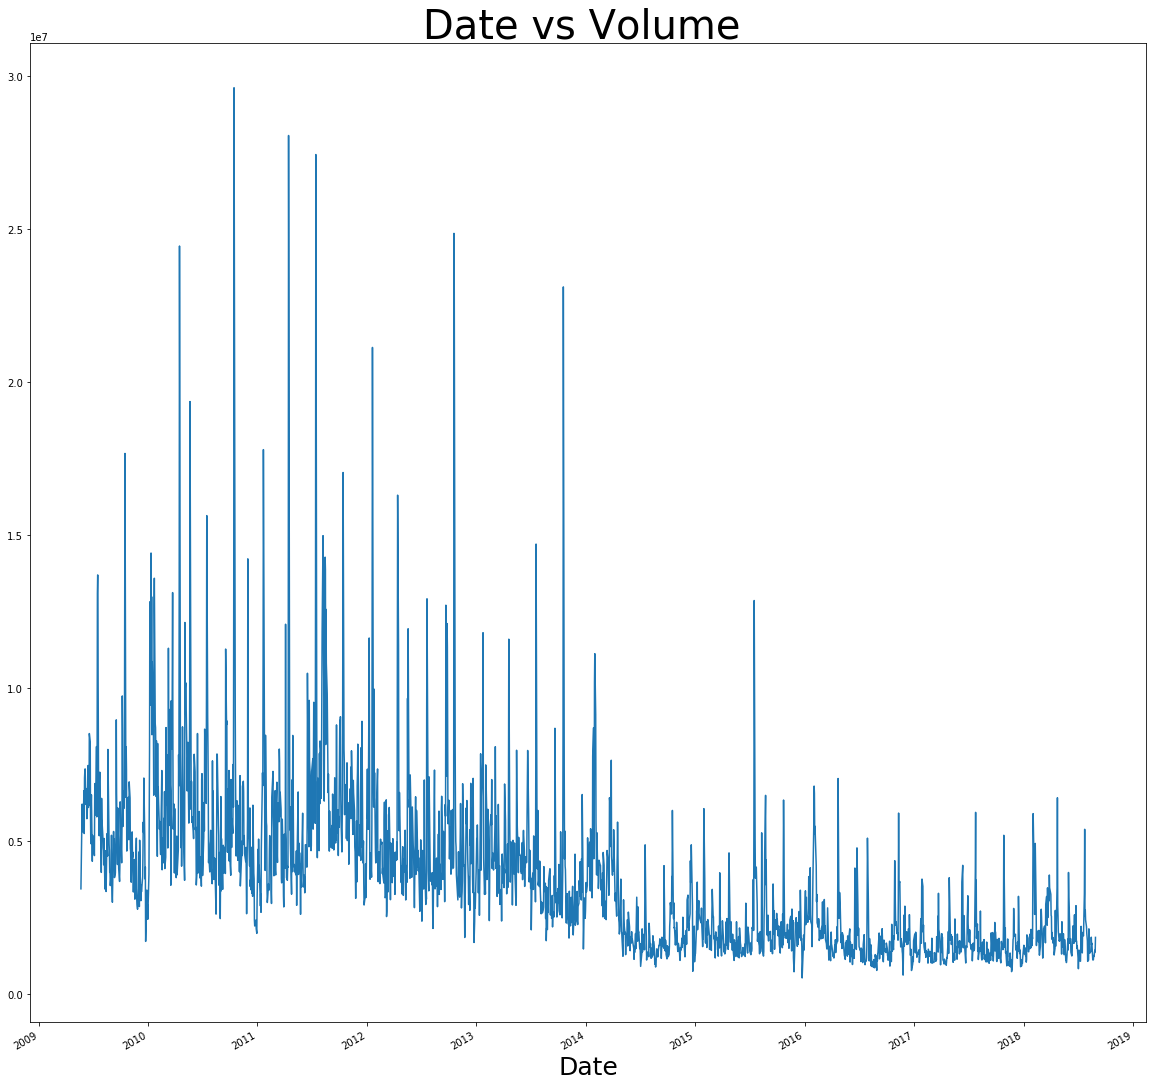

In [8]:
plt.figure(figsize=(20,20))
data['Volume'].plot()
plt.xlabel('Date',fontsize=25)
plt.title('Date vs Volume ',fontsize=40)
plt.show()

In [9]:
forecast_col='Close'
data.fillna(-99999,inplace =True)

In [10]:

forecast_out=30
print(forecast_out)

30


In [11]:
data['label']=data[forecast_col].shift(-forecast_out)

In [12]:
x=np.array(data.drop(['label'],1))
x=x[:-forecast_out]
x_lately=x[-forecast_out:]

In [13]:
data.dropna(inplace=True)
y=np.array(data['label'])


In [14]:
y

array([ 198.513519,  201.446442,  205.400406, ..., 1256.27002 ,
       1245.859985, 1264.650024])

## Using label encoding for normalization of data

In [15]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
y= lab_enc.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [17]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

## Applying linear regression model

In [18]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(x_train,y_train)
accuracy=clf.score(x_test,y_test)

In [19]:
print('Model accuracy is :',accuracy*100,'%')

Model accuracy is : 91.92180547590645 %


In [20]:
forecast_pred=clf.predict(x_lately)

## Forecasting(prediction) of 30 days 

In [21]:
forecast=[]
for i in forecast_pred:
    forecast.append(i/2)
forecast
    

[1261.1828765482983,
 1249.7352189800117,
 1239.4977636877843,
 1241.2760401102896,
 1246.8519236278203,
 1249.6929592434562,
 1255.468606431475,
 1255.6190654099964,
 1279.6005683435733,
 1276.3488904110663,
 1271.17535131031,
 1286.7293466813921,
 1279.850799560622,
 1261.9196045571816,
 1244.7540172468953,
 1233.2914326444002,
 1227.7582621313381,
 1230.1108664024077,
 1249.99238552849,
 1264.6414500966494,
 1238.213679802891,
 1261.6212983506794,
 1273.6797408908842,
 1280.4268454240369,
 1266.2911556050808,
 1292.3794688078906,
 1313.137421695575,
 1312.705243291642,
 1305.730623351406,
 1313.5691135309726]

## Here we have prediction of 15 days of data

In [22]:
forecast_pred=forecast[0:15]
forecast_pred

[1261.1828765482983,
 1249.7352189800117,
 1239.4977636877843,
 1241.2760401102896,
 1246.8519236278203,
 1249.6929592434562,
 1255.468606431475,
 1255.6190654099964,
 1279.6005683435733,
 1276.3488904110663,
 1271.17535131031,
 1286.7293466813921,
 1279.850799560622,
 1261.9196045571816,
 1244.7540172468953]

In [23]:
data['Forecast']=np.nan

In [24]:
last_date=data.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

In [25]:
last_unix

1531872000.0

## Last index of data

In [26]:
last_date

Timestamp('2018-07-18 00:00:00')

In [27]:
from datetime import datetime
for i in forecast_pred:
    next_date=datetime.fromtimestamp(next_unix)
#     print(next_date)
    next_unix+=one_day
#     print(next_unix)
    data.loc[next_date]=[np.nan for _ in range(len(data.columns)-1)]+[i]

## Visualization of predicted result over original close column data

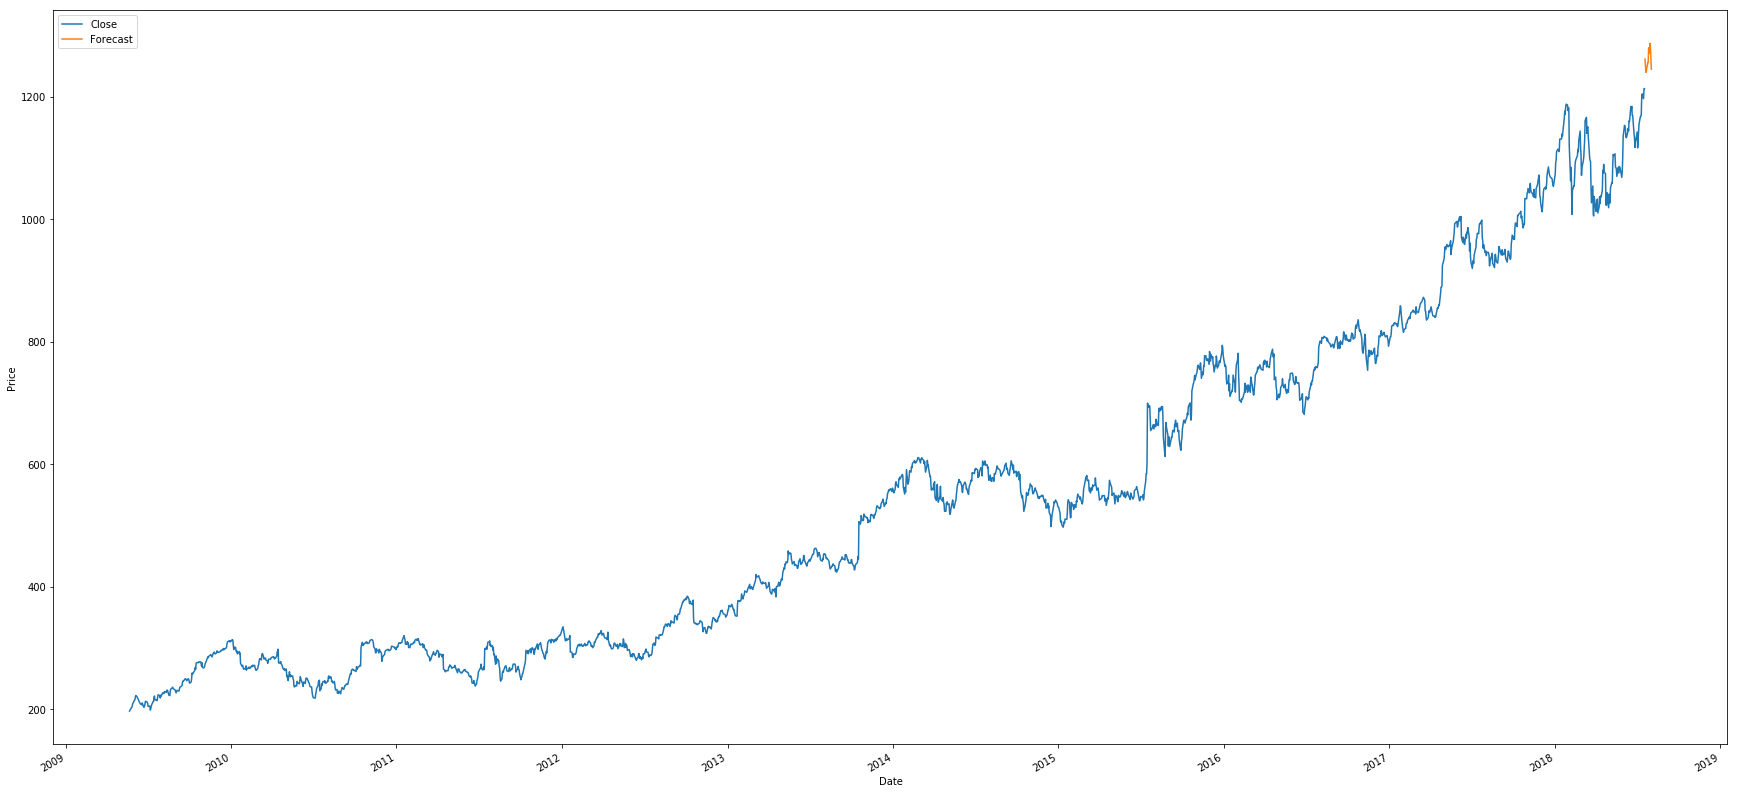

In [28]:
plt.figure(figsize=(30,15))
data['Close'].plot()
data['Forecast'].plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Here we got the accuracy of approx 93% by using liner regression model

## We can increase the accuracy of model by using xgboost,and some deep learning model 